In [68]:
import sys
sys.path.append("./tools/")
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
from sklearn.preprocessing import MinMaxScaler
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from pprint import pprint
%matplotlib inline

# Data Wrangling

In [2]:
# Get the data
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
pprint(data_dict)

{'ALLEN PHILLIP K': {'bonus': 4175000,
                     'deferral_payments': 2869717,
                     'deferred_income': -3081055,
                     'director_fees': 'NaN',
                     'email_address': 'phillip.allen@enron.com',
                     'exercised_stock_options': 1729541,
                     'expenses': 13868,
                     'from_messages': 2195,
                     'from_poi_to_this_person': 47,
                     'from_this_person_to_poi': 65,
                     'loan_advances': 'NaN',
                     'long_term_incentive': 304805,
                     'other': 152,
                     'poi': False,
                     'restricted_stock': 126027,
                     'restricted_stock_deferred': -126027,
                     'salary': 201955,
                     'shared_receipt_with_poi': 1407,
                     'to_messages': 2902,
                     'total_payments': 4484442,
                     'total_stock_value': 17295

                     'loan_advances': 'NaN',
                     'long_term_incentive': 1736055,
                     'other': 277464,
                     'poi': True,
                     'restricted_stock': 1794412,
                     'restricted_stock_deferred': 'NaN',
                     'salary': 440698,
                     'shared_receipt_with_poi': 'NaN',
                     'to_messages': 'NaN',
                     'total_payments': 2424083,
                     'total_stock_value': 1794412},
 'FITZGERALD JAY L': {'bonus': 350000,
                      'deferral_payments': 'NaN',
                      'deferred_income': 'NaN',
                      'director_fees': 'NaN',
                      'email_address': 'jay.fitzgerald@enron.com',
                      'exercised_stock_options': 664461,
                      'expenses': 23870,
                      'from_messages': 16,
                      'from_poi_to_this_person': 1,
                      'from_this_person_to_

                'from_messages': 39,
                'from_poi_to_this_person': 13,
                'from_this_person_to_poi': 14,
                'loan_advances': 'NaN',
                'long_term_incentive': 'NaN',
                'other': 1573324,
                'poi': True,
                'restricted_stock': 869220,
                'restricted_stock_deferred': 'NaN',
                'salary': 211844,
                'shared_receipt_with_poi': 91,
                'to_messages': 225,
                'total_payments': 2003885,
                'total_stock_value': 2493616},
 'SHERRICK JEFFREY B': {'bonus': 'NaN',
                        'deferral_payments': 'NaN',
                        'deferred_income': 'NaN',
                        'director_fees': 'NaN',
                        'email_address': 'jeffrey.sherrick@enron.com',
                        'exercised_stock_options': 1426469,
                        'expenses': 'NaN',
                        'from_messages': 25,
        

In [3]:
# Trasform into a dataframe
df = pd.DataFrame.from_dict(data_dict, orient='index')
df.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       146 non-null object
to_messages                  146 non-null object
deferral_payments            146 non-null object
total_payments               146 non-null object
exercised_stock_options      146 non-null object
bonus                        146 non-null object
restricted_stock             146 non-null object
shared_receipt_with_poi      146 non-null object
restricted_stock_deferred    146 non-null object
total_stock_value            146 non-null object
expenses                     146 non-null object
loan_advances                146 non-null object
from_messages                146 non-null object
other                        146 non-null object
from_this_person_to_poi      146 non-null object
poi                          146 non-null bool
director_fees                146 non-null object
deferred_income              146 non-null object


In [9]:
df.describe()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
count,146,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,146,146,146,146
unique,95,87,40,126,102,42,98,84,19,125,...,5,65,93,42,2,18,45,53,112,58
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
freq,51,60,107,21,44,64,36,60,128,20,...,142,60,53,60,128,129,97,80,35,60


In [10]:
df.shape

(146, 21)

In [11]:
# Replace the string 'NaN' with np.nan
df.replace('NaN', np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       95 non-null float64
to_messages                  86 non-null float64
deferral_payments            39 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
bonus                        82 non-null float64
restricted_stock             110 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
expenses                     95 non-null float64
loan_advances                4 non-null float64
from_messages                86 non-null float64
other                        93 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          146 non-null bool
director_fees                17 non-null float64
deferred_income              49 non-null float

In [12]:
# Drop the email_address col
df.drop('email_address', axis=1, inplace=True)
df.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,-126027.0,1729541.0,13868.0,NaN,2195.0,152.0,65.0,False,NaN,-3081055.0,304805.0,47.0
BADUM JAMES P,NaN,NaN,178980.0,182466.0,257817.0,NaN,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477.0,566.0,NaN,916197.0,4046157.0,NaN,1757552.0,465.0,-560222.0,5243487.0,56301.0,NaN,29.0,864523.0,0.0,False,NaN,-5104.0,NaN,39.0
BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,NaN,NaN,10623258.0,11200.0,NaN,NaN,2660303.0,NaN,False,NaN,-1386055.0,1586055.0,NaN
BAY FRANKLIN R,239671.0,NaN,260455.0,827696.0,NaN,400000.0,145796.0,NaN,-82782.0,63014.0,129142.0,NaN,NaN,69.0,NaN,False,NaN,-201641.0,NaN,NaN


In [13]:
# Get the percent of null values in each col
def find_null_perc(df):
    """
    Given @df, find percent of nulls in all cols
    """
    null_percent = df.isnull().sum(axis=0)/len(df)
    return(null_percent)
    
find_null_perc(df)

salary                       0.349315
to_messages                  0.410959
deferral_payments            0.732877
total_payments               0.143836
exercised_stock_options      0.301370
bonus                        0.438356
restricted_stock             0.246575
shared_receipt_with_poi      0.410959
restricted_stock_deferred    0.876712
total_stock_value            0.136986
expenses                     0.349315
loan_advances                0.972603
from_messages                0.410959
other                        0.363014
from_this_person_to_poi      0.410959
poi                          0.000000
director_fees                0.883562
deferred_income              0.664384
long_term_incentive          0.547945
from_poi_to_this_person      0.410959
dtype: float64

In [14]:
# Get the cols whose null value percentage is over 50%
null_percent = find_null_perc(df)
cols_drop = null_percent[null_percent>=.5]
cols_drop = cols_drop.index.tolist()
print(cols_drop)

['deferral_payments', 'restricted_stock_deferred', 'loan_advances', 'director_fees', 'deferred_income', 'long_term_incentive']


In [15]:
# Now drop these columns from the df
df.drop(cols_drop, axis=1, inplace=True)
df.head()

,salary,to_messages,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,total_stock_value,expenses,from_messages,other,from_this_person_to_poi,poi,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,1729541.0,13868.0,2195.0,152.0,65.0,False,47.0
BADUM JAMES P,NaN,NaN,182466.0,257817.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,False,NaN
BANNANTINE JAMES M,477.0,566.0,916197.0,4046157.0,NaN,1757552.0,465.0,5243487.0,56301.0,29.0,864523.0,0.0,False,39.0
BAXTER JOHN C,267102.0,NaN,5634343.0,6680544.0,1200000.0,3942714.0,NaN,10623258.0,11200.0,NaN,2660303.0,NaN,False,NaN
BAY FRANKLIN R,239671.0,NaN,827696.0,NaN,400000.0,145796.0,NaN,63014.0,129142.0,NaN,69.0,NaN,False,NaN


In [16]:
# Convert poi col to numeric
df['poi'].replace([False, True], [0, 1], inplace=True)

In [17]:
# Drop rows where all cells in that row is NA
df.dropna(thresh=2, inplace=True)
df.shape

(145, 14)

In [18]:
df.loc['TOTAL']

salary                      26704229.0
to_messages                        NaN
total_payments             309886585.0
exercised_stock_options    311764000.0
bonus                       97343619.0
restricted_stock           130322299.0
shared_receipt_with_poi            NaN
total_stock_value          434509511.0
expenses                     5235198.0
from_messages                      NaN
other                       42667589.0
from_this_person_to_poi            NaN
poi                                0.0
from_poi_to_this_person            NaN
Name: TOTAL, dtype: float64

In [19]:
# "Total" is not a person, thus drop the row
df.drop('TOTAL', inplace=True)
df.shape

(144, 14)

In [20]:
# Impute missing values with mean and median and create df's
df_mean_imputed = df.fillna(df.mean())
df_median_imputed = df.fillna(df.median())

In [21]:
df_mean_imputed.isnull().sum()

salary                     0
to_messages                0
total_payments             0
exercised_stock_options    0
bonus                      0
restricted_stock           0
shared_receipt_with_poi    0
total_stock_value          0
expenses                   0
from_messages              0
other                      0
from_this_person_to_poi    0
poi                        0
from_poi_to_this_person    0
dtype: int64

In [56]:
# Deal with outliers


# EDA

In [23]:
# Check class distribution
df.poi.value_counts()

0    126
1     18
Name: poi, dtype: int64

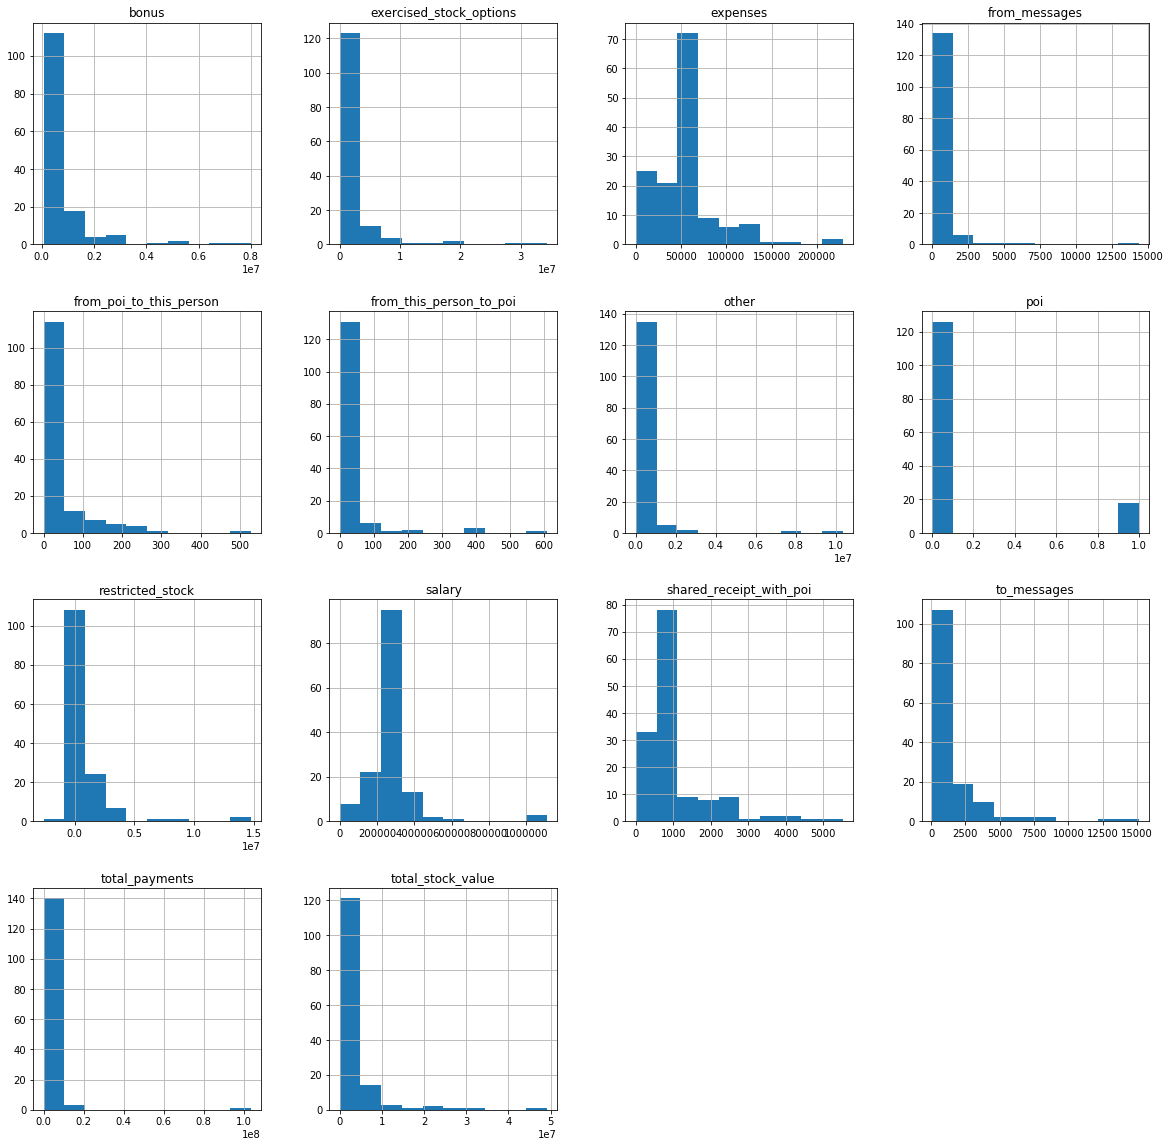

In [32]:
# Univariate distribution

df.hist(figsize=(20, 20))
pyplot.show()

In [28]:
# Therefore median imputation is a better option
df = df_median_imputed.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 14 columns):
salary                     144 non-null float64
to_messages                144 non-null float64
total_payments             144 non-null float64
exercised_stock_options    144 non-null float64
bonus                      144 non-null float64
restricted_stock           144 non-null float64
shared_receipt_with_poi    144 non-null float64
total_stock_value          144 non-null float64
expenses                   144 non-null float64
from_messages              144 non-null float64
other                      144 non-null float64
from_this_person_to_poi    144 non-null float64
poi                        144 non-null int64
from_poi_to_this_person    144 non-null float64
dtypes: float64(13), int64(1)
memory usage: 16.9+ KB


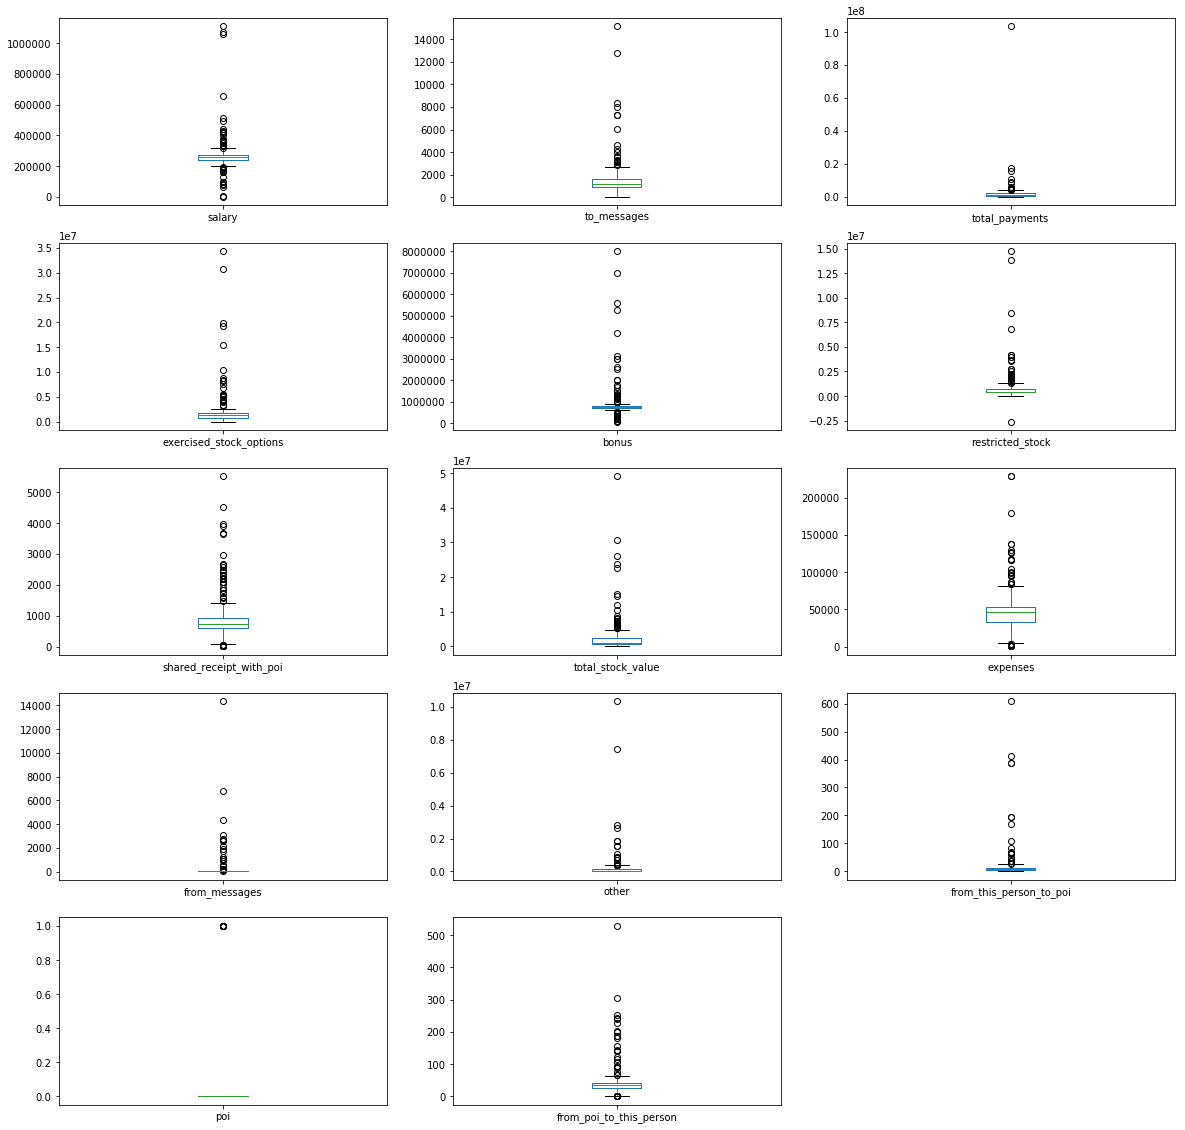

In [33]:
# Boxplot
df.plot(kind='box', 
        subplots=True, 
        layout=(5,3), 
        sharex=False, 
        sharey=False, 
        figsize=(20,20))
pyplot.show()

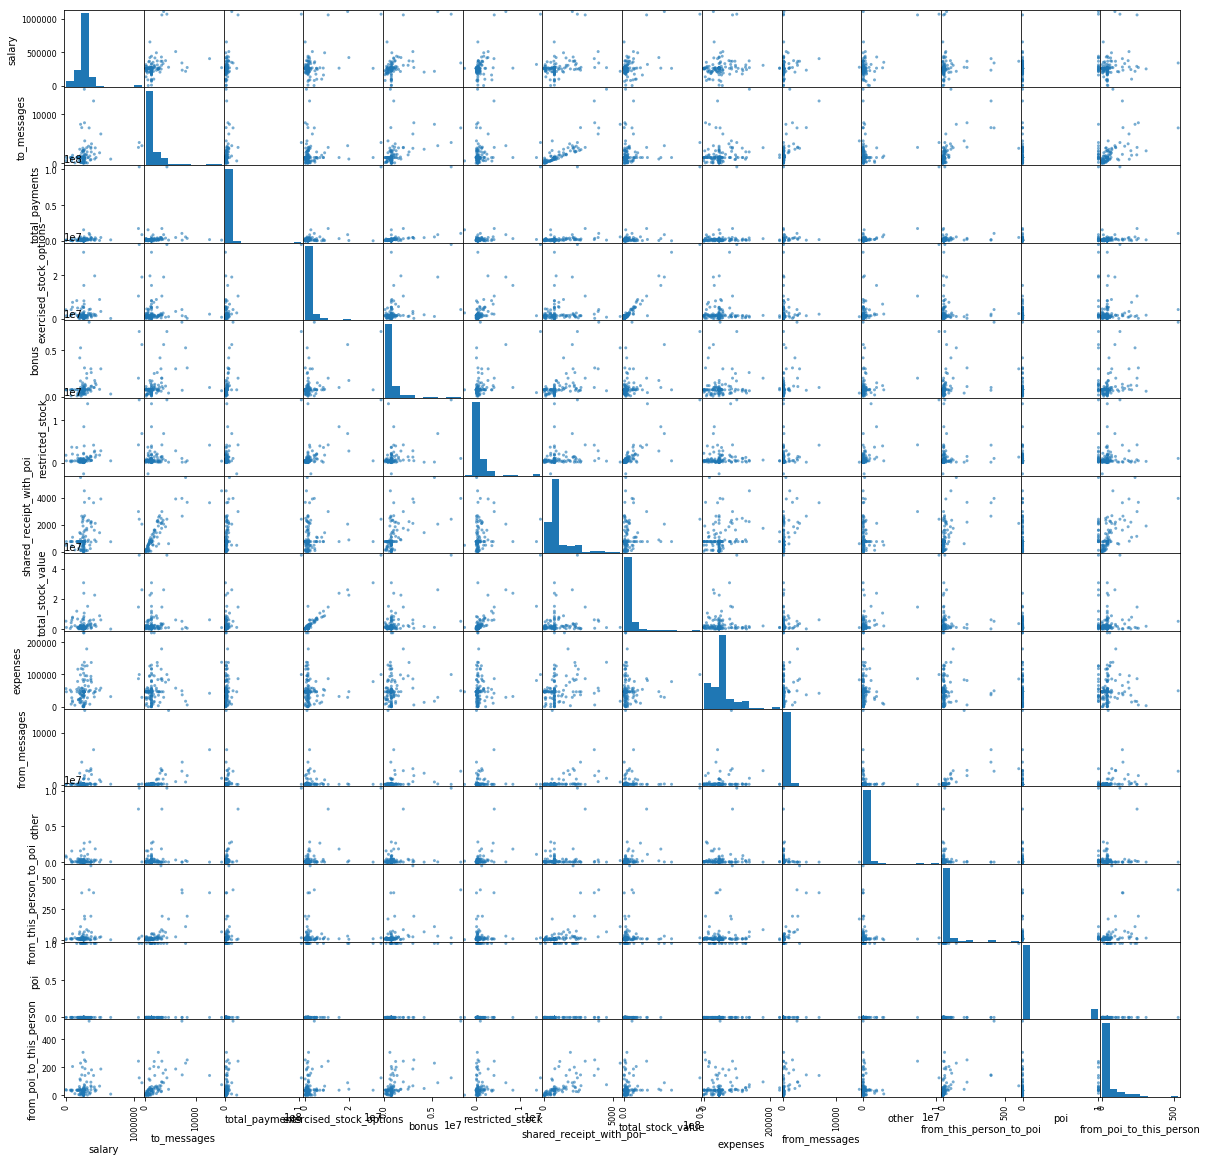

In [41]:
# Scatterplot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.6, figsize=(20, 20))
pyplot.show()

# Feature Selection

In [48]:
# First check feature importance
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[ 0.0751866   0.03011627  0.07964704  0.12576643  0.10766621  0.07469052
  0.08938861  0.086485    0.05400958  0.03479601  0.10155273  0.07223761
  0.06845738]


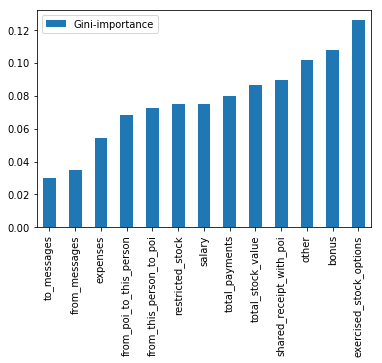

In [52]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90)

In [60]:
# Split the features and labels
y = df['poi'].copy()
X = df.drop('poi', axis=1).copy()

# Split into train test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.1, random_state=8, stratify=y)

In [76]:
# Prepare the pipeline including preprocessing, feature selection and algorithm running
# Algorithms: SVC(), LinearSVC(), KNeighborsClassifier(), RandomForestClassifier(), GaussianNB() 
pipe = make_pipeline(MinMaxScaler(),
                     SelectKBest(),
                     RandomForestClassifier())

param_grid = {#'pca__n_components': [2],
          'selectkbest__k': [13],
          'selectkbest__score_func': [f_classif],
          #'linearsvc__C': [0.1, 1, 10, 100],
          #'linearsvc__dual': [False],
          #'linearsvc__tol': [0.000001],
          #'kneighborsclassifier__n_neighbors': [1, 5],
          #'kneighborsclassifier__weights': ['uniform'], 
          #'kneighborsclassifier__algorithm': ['auto', 'ball_tree'],
          #'kneighborsclassifier__leaf_size': [1, 10],
          #'svc__C': [0.1, 1, 10, 100],
          #'svc__kernel': ['linear', 'rbf'],
          #'svc__gamma': [0.001, 0.0001],
          #'randomforestclassifier__n_estimators': [5, 10, 20]
          }

# Make an StratifiedShuffleSplit iterator for cross-validation in GridSearchCV
cv = StratifiedShuffleSplit(n_splits=20, 
                             test_size=.1, 
                             random_state=8)

# Make the estimator using GridSearchCV and run cross-validation
clf = GridSearchCV(estimator=pipe,
                   param_grid=params,
                   scoring='f1',
                   n_jobs=1,
                   cv=cv,
                   verbose=1,
                   error_score=0)

# Fit the model using premade estimator clf
clf.fit(X_train, y_train)

# Test the model using the hold-out test data
pred = clf.predict(X_test)
print('\nClassification Peformance Report:') 
report = classification_report(y_true=y_test,
                               y_pred=pred)
print(report)

Fitting 20 folds for each of 1 candidates, totalling 20 fits

Classification Peformance Report:
             precision    recall  f1-score   support

          0       0.93      1.00      0.96        13
          1       1.00      0.50      0.67         2

avg / total       0.94      0.93      0.92        15



[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.7s finished


In [ ]:
#########################################
### STEP 5: MODEL FITTING AND TESTING ###
#########################################



# Calculate feature scores
scores = clf.best_estimator_.named_steps['selectkbest'].scores_
scores = [round(s, 2) for s in scores] #round to 2 decimal points

# Combine with features names and rank by score
ftr_score = zip(features_list[1:], scores)
ftr_score_sorted = sorted(ftr_score,
                          key = lambda item: item[1],
                          reverse = True) 
print "\nThe Scores for All the Features are:"
pprint(ftr_score_sorted)

# Find out the features selected by SelectKBest
ftr_index = clf.best_estimator_.named_steps['selectkbest'].get_support()
ftrs = [x for x, y in zip(features_list[1:], ftr_index) if y]
print "\nThe Selected Features Are:\n", ftrs 



# Save Model

In [ ]:
dump_classifier_and_data(clf, my_dataset, features_list)